In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from matplotlib.ticker import MaxNLocator

In [47]:
rcParams['font.family']='Times New Roman'

In [4]:
data = []

fileorder = ['13', '20', '40', '56', '71', '116', '98', '43']

for i in range(6):
    data.append([])
    for j in range(5):
        data[i].append([])
        for order in fileorder:
            with open(f'./{i+1}/records{j+1}/{order}_score.txt') as f:
                _data = list(map(float, f.readline().split()))
                data[i][j].append(_data)

In [28]:
fileorder = ['13', '20', '40', '56', '71', '116', '98', '43']

F1 = [[[] for _ in range(6)] for _ in range(8)]

for i in range(6):
    for j in range(5):
        for k, order in enumerate(fileorder):
            with open(f'./{i+1}/records{j+1}/{order}_score.txt') as f:
                _data = list(map(float, f.readline().split()))
                F1[k][i].append(_data[2])

F1 = np.array(F1)

precision = [[[] for _ in range(6)] for _ in range(8)]

for i in range(6):
    for j in range(5):
        for k, order in enumerate(fileorder):
            with open(f'./{i+1}/records{j+1}/{order}_score.txt') as f:
                _data = list(map(float, f.readline().split()))
                precision[k][i].append(_data[0] * 100)

precision = np.array(precision)

recall = [[[] for _ in range(6)] for _ in range(8)]

for i in range(6):
    for j in range(5):
        for k, order in enumerate(fileorder):
            with open(f'./{i+1}/records{j+1}/{order}_score.txt') as f:
                _data = list(map(float, f.readline().split()))
                recall[k][i].append(_data[1] * 100)

recall = np.array(recall)

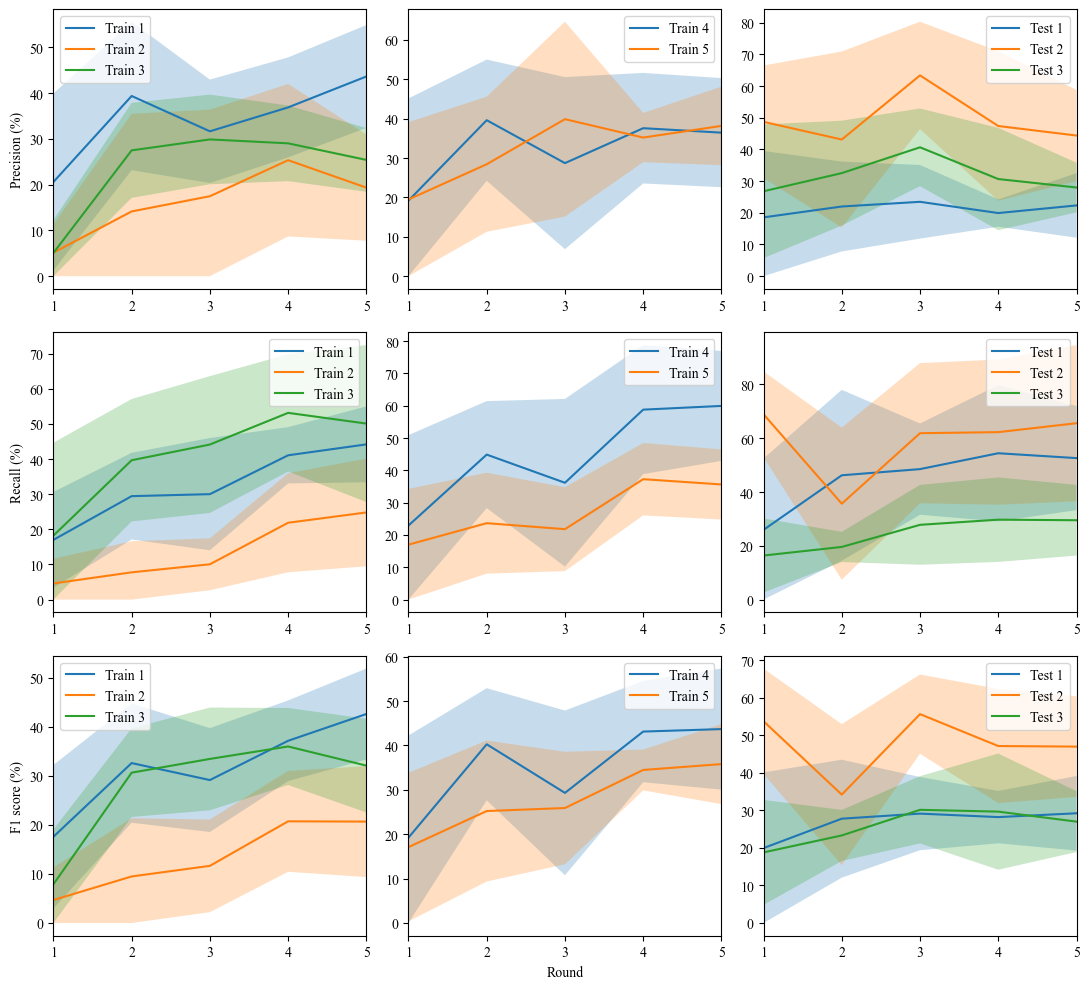

In [51]:
fig = plt.figure(figsize=(11,10))

x = np.arange(1, 6)
mean1 = precision.mean(axis=1)
std1 = precision.std(axis=1)
mean2 = recall.mean(axis=1)
std2 = recall.std(axis=1)
mean3 = F1.mean(axis=1)
std3 = F1.std(axis=1)

plt.subplot(331)
for i in range(3):
    plt.plot(x, mean1[i], label=f'Train {i+1}')
    plt.fill_between(x, np.maximum(mean1[i]-std1[i],0), mean1[i]+std1[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.ylabel('Precision (%)')
plt.legend()

plt.subplot(332)
for i in range(3,5):
    plt.plot(x, mean1[i], label=f'Train {i+1}')
    plt.fill_between(x, np.maximum(mean1[i]-std1[i],0), mean1[i]+std1[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.legend()

plt.subplot(333)
for i in range(5,8):
    plt.plot(x, mean1[i], label=f'Test {i-4}')
    plt.fill_between(x, np.maximum(mean1[i]-std1[i],0), mean1[i]+std1[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.legend()

plt.subplot(334)
for i in range(3):
    plt.plot(x, mean2[i], label=f'Train {i+1}')
    plt.fill_between(x, np.maximum(mean2[i]-std2[i],0), mean2[i]+std2[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.ylabel('Recall (%)')
plt.legend()

plt.subplot(335)
for i in range(3,5):
    plt.plot(x, mean2[i], label=f'Train {i+1}')
    plt.fill_between(x, np.maximum(mean2[i]-std2[i],0), mean2[i]+std2[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.legend()

plt.subplot(336)
for i in range(5,8):
    plt.plot(x, mean2[i], label=f'Test {i-4}')
    plt.fill_between(x, np.maximum(mean2[i]-std2[i],0), mean2[i]+std2[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.legend()

plt.subplot(337)
for i in range(3):
    plt.plot(x, mean3[i], label=f'Train {i+1}')
    plt.fill_between(x, np.maximum(mean3[i]-std3[i],0), mean3[i]+std3[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.ylabel('F1 score (%)')
plt.legend()

plt.subplot(338)
for i in range(3,5):
    plt.plot(x, mean3[i], label=f'Train {i+1}')
    plt.fill_between(x, np.maximum(mean3[i]-std3[i],0), mean3[i]+std3[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.xlabel('Round')
plt.legend()

plt.subplot(339)
for i in range(5,8):
    plt.plot(x, mean3[i], label=f'Test {i-4}')
    plt.fill_between(x, np.maximum(mean3[i]-std3[i],0), mean3[i]+std3[i], alpha=0.25)
plt.xlim((1,5))
plt.xticks([1,2,3,4,5])
plt.legend()

fig.tight_layout()
plt.show()

fig.savefig('train-1.pdf')